<b><p style="font-size:200%;  color:#474973">[ IBM Data Analysis with Python Final Project  ] </p></b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

<b><p style="font-size:150%;  color:#333457">Final Project Scenario</p></b>

<p style="font-size:120%;  color:#333457">
In this assignment, you are a Data Analyst working at a Real Estate Investment Trust. The Trust would like to start investing in Residential real estate. <u>You are tasked with determining the market price of a house given a set of features</u>. You will analyze and predict housing prices using attributes or features such as square footage, number of bedrooms, number of floors, and so on. A template notebook is provided in the lab; your job is to complete the ten questions. Some hints to the questions are given in the template notebook.


<b><p style="font-size:120%;  color:#333457">About the Data</p></b>

<p style="font-size:120%;  color:#333457">
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from here. It was also slightly modified for the purposes of this course. 
</p>



<b><p style="font-size:170%;  color:#494A4A">  Module 1: Importing Data Sets  </p></b>


In [2]:
df= pd.read_csv('D://pyworks/pydata/kc_house_prices.csv')
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<p style="font-size:125%;  color:#669C1B">
<b> Q1</b> :Display the data types of each column using the function dtypes
</p>


In [3]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

<b><p style="font-size:170%;  color:#494A4A">  Module 2: Data Wrangling </p></b>




<p style="font-size:125%;  color:#669C1B">
<b>Q2</b> : Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. 
</p>

In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.drop(columns=["id",'Unnamed: 0'],inplace=True)  

In [ ]:
df.describe()

In [7]:
# print the missing values for the columns  bedrooms and  bathrooms 

print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [8]:
# Replace the missing values in bedroms

mean1=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean1, inplace=True)

mean2=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean2, inplace=True)

In [9]:
# Check again for NA values
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


<b><p style="font-size:170%;  color:#494A4A">  Module 3: Exploratory Data Analysis </p></b> 


<br>
<p style="font-size:125%;  color:#669C1B">
<b>Q3</b> :Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a data frame
</p>


In [10]:
floors = df['floors'].value_counts().to_frame().reset_index()
floors

,floors,count
0,1.0,10680
1,2.0,8241
2,1.5,1910
3,3.0,613
4,2.5,161
5,3.5,8



<br> 
<p style="font-size:125%;  color:#669C1B">
<b>Q4</b>: Use the function boxplot to determine whether houses with a waterfront view or without a waterfront view have more price outliers.
</p>

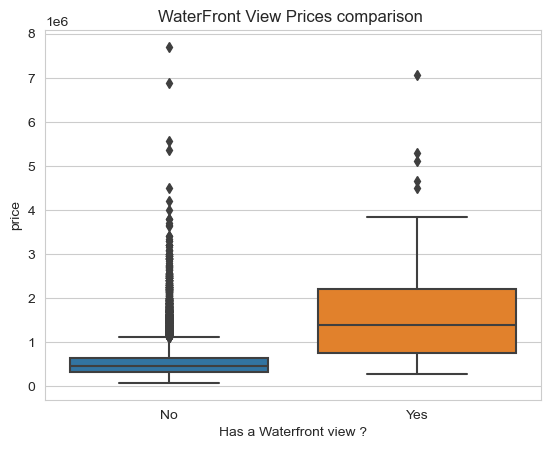

In [11]:
# using the boxplot to show the number of outliers:

sns.set_style("whitegrid")
m= sns.boxplot(x= 'waterfront' , y= 'price' , data=df)
m.set(xlabel ="Has a Waterfront view ?",  title ='WaterFront View Prices comparison ')
m.set_xticklabels(['No', 'Yes']);


<br>
<p style="font-size:125%;  color:#669C1B">
<b>Q5</b> : Use the function regplot to determine if the feature sqft_above is negatively or positively correlated with price
</p>

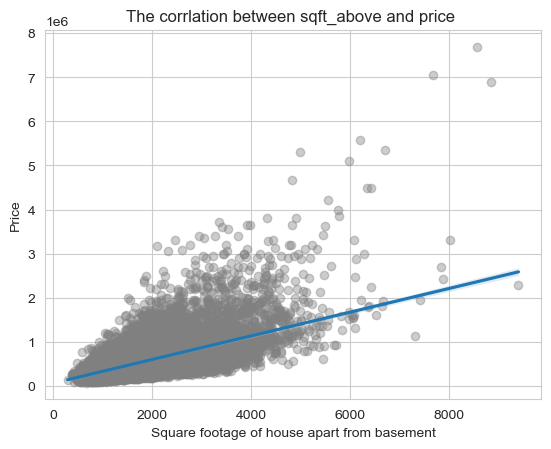

In [12]:
# create a regression plot to determine the corrlation between sqft_above and price:

sns.set_style("whitegrid")
m= sns.regplot(x= 'sqft_above' , y= 'price' , data=df, scatter_kws={'alpha':0.4 , 'color':'gray'})
m.set(xlabel ="Square footage of house apart from basement", 
      ylabel ="Price", 
      title ='The corrlation between sqft_above and price ');

<b><p style="font-size:170%;  color:#494A4A">  Module 4: Model Development </p></b> 



We can Fit a linear regression model using the longitude feature 'long' and caculate the R^2.


<br>
<p style="font-size:125%;  color:#669C1B">
<b>Q6</b> : Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2
</p>


In [15]:
# create variables :
X = df[['sqft_living']]
y = df['price']

# create the model 
lm= LinearRegression()

# fit the model
lm.fit(X,y)

# make a prediction 
y_hat=lm.predict(X)

r_squared_1 = lm.score(X, y)

################################################################
# another way to calaculate R^2 using r2_score library
r_squared_2 = r2_score(y, y_hat) 

# get the results
r_squared_1, r_squared_2

(0.4928532179037931, 0.4928532179037931)


<br>
<p style="font-size:125%;  color:#669C1B">
<b>Q7</b> : Fit a linear regression model to predict the 'price' using the list of given features:
</p>


In [17]:
# create a new variable 
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]  

# feature data
X= df[features]

# target variable 
y= df['price']

# Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit The linear regression model
lm = LinearRegression()
lm.fit(X_scaled, y)

# Predict using the scaled data
y_hat = lm.predict(X_scaled)

# calculate R^2
r_squared = r2_score(y, y_hat)

# Print the results for R^2 
print(f' the R_squared result for the model = {r_squared}')

 the R_squared result for the model = 0.65769516660375



<br>
<p style="font-size:125%;  color:#669C1B">
<b>Q8</b> : create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2
</p>


In [18]:
# define the feature and target :
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]  
X= df[features]
y= df['price']

# Split Data into Training and Test Sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# create a pipeline object as requestd :
Input=[('scale',StandardScaler()),
       ('polynomial', PolynomialFeatures(include_bias=False)),
       ('model',LinearRegression())]

pipeline = Pipeline(Input)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Use the pipeline to make predictions on the test data
y_pred = pipeline.predict(X_test)

# calculate R^2
r2_result = r2_score(y_test, y_pred)

# Print the results for R^2 
print(f' the R_squared result for pipeline = {r2_result}')

 the R_squared result for pipeline = 0.759980799315517




<b><p style="font-size:170%;  color:#494A4A">  Module 5: Model Evaluation and Refinement </p></b> 


<br>
<p style="font-size:125%;  color:#669C1B">
<b>Q9</b> : Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data. Take a screenshot of your code and the value of the R^2
</p>


In [19]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split data
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=1)

# Fitting The Ridge regression model
ridge = Ridge(alpha=0.1) 
ridge.fit(x_train, y_train)

# Predicting for test data
y_pred =  ridge.predict(x_test)

# Evaluating the model 
r2 = r2_score(y_test,y_pred )

# Print the results for R^2 
print(f' the R_squared result for the ridge model = {r2}')

 the R_squared result for the ridge model = 0.646185751262637


<br>
<p style="font-size:125%;  color:#669C1B">
<b>Q10</b> : Perform a second order polynomial. Create and fit a Ridge regression, set the regularisation parameter to 0.1, and calculate the R^2 .
</p>


In [20]:
# prepare data: 
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']
# Scaling features:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split data to train and test (80 20)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=1)

# create a pipeline object :
Input=[('polynomial', PolynomialFeatures(degree=2, include_bias=False)),
       ('model',Ridge(alpha=0.1)) ]

pipeline = Pipeline(Input)

# Fit the pipeline on the training data:
pipeline.fit(x_train, y_train)

# Use the pipeline to make predictions on the test data:
y_pred = pipeline.predict(x_test)

# calculate R^2:
r2_result = r2_score(y_test, y_pred)

# Print the results for R^2:
print(f' the R_squared result for pipeline = {r2_result}')

 the R_squared result for pipeline = 0.7632811659636093


<br>
<b><p style="font-size:200%; text-align: center;  color:#494A4A">  Done  </p></b>
<b><p style="font-size:110%; text-align: center; color:#494A4A">  Thank you for your time   </p></b>